In [ ]:
AIRQUILITY PREDICTION MODEL

# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df= pd.read_csv('data/AirQualityUCI.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,NaN,NaN
1,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
2,10-03-2004,19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
3,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
4,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN


In [5]:
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

In [8]:
df1=pd.read_csv('data/AirQualityUCI.csv',header=None,skiprows=1,names=col)
df1.head(10)

DATE    TIME  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  \
10-03-2004 18:00:00   2.6  1360.0  150.0        11.9   1046.0    166.0   
           19:00:00   2.0  1292.0  112.0         9.4    955.0    103.0   
           20:00:00   2.2  1402.0   88.0         9.0    939.0    131.0   
           21:00:00   2.2  1376.0   80.0         9.2    948.0    172.0   
           22:00:00   1.6  1272.0   51.0         6.5    836.0    131.0   
           23:00:00   1.2  1197.0   38.0         4.7    750.0     89.0   
11-03-2004 00:00:00   1.2  1185.0   31.0         3.6    690.0     62.0   
           01:00:00   1.0  1136.0   31.0         3.3    672.0     62.0   
           02:00:00   0.9  1094.0   24.0         2.3    609.0     45.0   
           03:00:00   0.6  1010.0   19.0         1.7    561.0   -200.0   

                     PT08_S2_NMHC  NOX_GT  PT08_S3_NOX  NO2_GT  PT08_S4_NO2  \
10-03-2004 18:00:00        1056.0   113.0       1692.0  1268.0         13.6   
           19:00:00        1174.0    92.0       1559.0   972.0         13.3   
           20:00:00        1140.0   114.0       1555.0  1074.0         11.9   
           21:00:00        1092.0   122.0       1584.0  1203.0         11.0   
           22:00:00        1205.0   116.0       1490.0  1110.0         11.2   
           23:00:00        1337.0    96.0       1393.0   949.0         11.2   
11-03-2004 00:00:00        1462.0    77.0       1333.0   733.0         11.3   
           01:00:00        1453.0    76.0       1333.0   730.0         10.7   
           02:00:00        1579.0    60.0       1276.0   620.0         10.7   
           03:00:00        1705.0  -200.0       1235.0   501.0         10.3   

                     PT08_S5_O3       T  RH  AH  
10-03-2004 18:00:00        48.9  0.7578 NaN NaN  
           19:00:00        47.7  0.7255 NaN NaN  
           20:00:00        54.0  0.7502 NaN NaN  
           21:00:00        60.0  0.7867 NaN NaN  
           22:00:00        59.6  0.7888 NaN NaN  
           23:00:00        59.2  0.7848 NaN NaN  
11-03-2004 00:00:00        56.8  0.7603 NaN NaN  
           01:00:00        60.0  0.7702 NaN NaN  
           02:00:00        59.7  0.7648 NaN NaN  
           03:00:00        60.2  0.7517 NaN NaN

In [9]:
r=list(np.arange(len(col)))

In [11]:
df1=pd.read_csv('data/AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-100,usecols=r)

In [12]:
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10-03-2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11-03-2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11-03-2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11-03-2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11-03-2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [13]:
df1.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [14]:
df1.tail(130)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9341,03-04-2005,23:00:00,1.2,1100.0,-200.0,5.1,769.0,170.0,722.0,128.0,1147.0,1049.0,14.3,52.5,0.8497
9342,04-04-2005,00:00:00,0.9,1012.0,-200.0,3.5,683.0,117.0,801.0,93.0,1073.0,816.0,14.2,51.4,0.8275
9343,04-04-2005,01:00:00,0.6,944.0,-200.0,1.9,579.0,70.0,925.0,58.0,1002.0,598.0,13.8,51.2,0.8058
9344,04-04-2005,02:00:00,0.5,912.0,-200.0,1.5,544.0,69.0,959.0,55.0,1002.0,573.0,12.1,56.3,0.7927
9345,04-04-2005,03:00:00,0.4,887.0,-200.0,1.1,508.0,62.0,1047.0,51.0,974.0,549.0,11.3,58.9,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df1.dropna(how='all',inplace=True)

In [16]:
df1.tail(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9347,04-04-2005,05:00:00,0.5,888.0,-200.0,1.3,528.0,77.0,1077.0,53.0,987.0,578.0,10.4,59.9,0.7550
9348,04-04-2005,06:00:00,1.1,1031.0,-200.0,4.4,730.0,182.0,760.0,93.0,1129.0,905.0,9.5,63.1,0.7531
9349,04-04-2005,07:00:00,4.0,1384.0,-200.0,17.4,1221.0,594.0,470.0,155.0,1600.0,1457.0,9.7,61.9,0.7446
9350,04-04-2005,08:00:00,5.0,1446.0,-200.0,22.4,1362.0,586.0,415.0,174.0,1777.0,1705.0,13.5,48.9,0.7553
9351,04-04-2005,09:00:00,3.9,1297.0,-200.0,13.6,1102.0,523.0,507.0,187.0,1375.0,1583.0,18.2,36.3,0.7487
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [17]:
df1.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [18]:
df1.shape

(9357, 15)

#CLEANING DATA

In [19]:
print('Missing values:\n\n',df1.shape[0]-df1.count())
clean=(df1.shape[0]-df1.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


No Missing Values


In [20]:
df1['DATE']=pd.to_datetime(df1.DATE, format='%d-%m-%Y')
df1['MONTH']= df1['DATE'].dt.month
df1.head(10)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3
5,2004-03-10,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,3
6,2004-03-11,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,3
7,2004-03-11,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,3
8,2004-03-11,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,3
9,2004-03-11,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,3


In [21]:
df1['HOUR']=df1['TIME'].apply(lambda x: int(x.split(':')[0]))
df1.HOUR.head(10)


0    18
1    19
2    20
3    21
4    22
5    23
6     0
7     1
8     2
9     3
Name: HOUR, dtype: int64

In [22]:
df1.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,18
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,19
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,20
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,21
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,22


In [24]:
print(df1.dtypes)


DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                float64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
MONTH                    int32
HOUR                     int64
dtype: object


In [25]:
numeric_df = df1.select_dtypes(include=['float64', 'int64'])


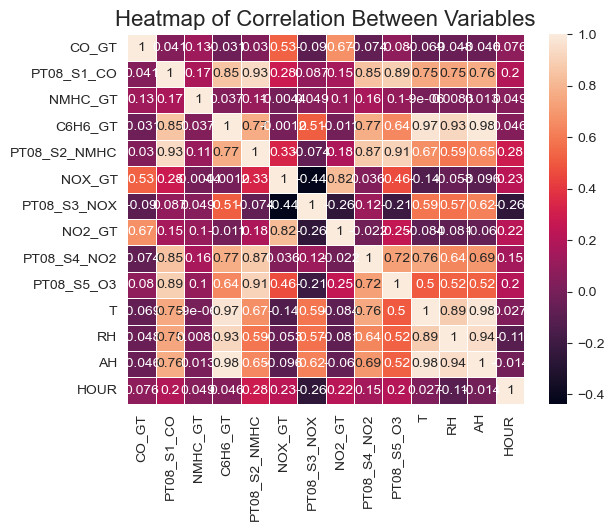

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df1.select_dtypes(include=['float64', 'int64'])


corr_matrix = numeric_df.corr()


sns.heatmap(corr_matrix, annot=True, linewidths=0.4)
plt.title('Heatmap of Correlation Between Variables', fontsize=16)
plt.show()


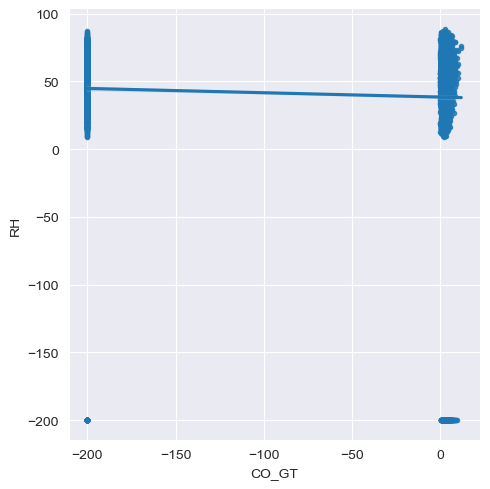

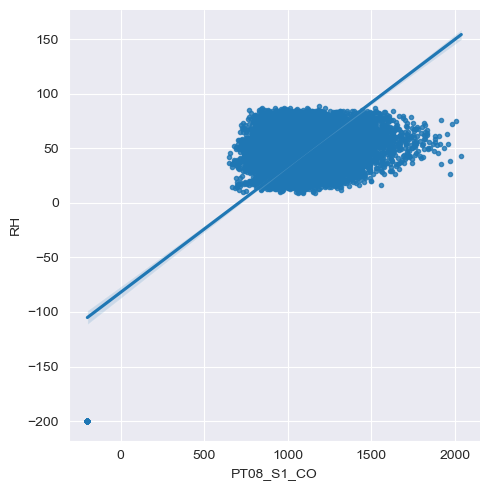

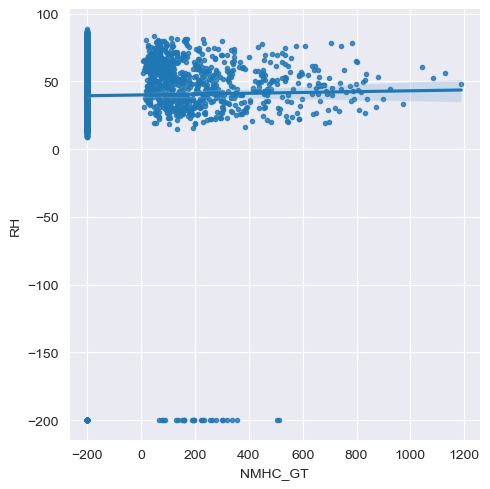

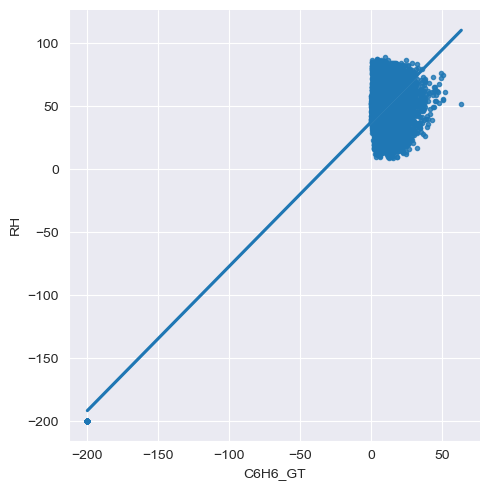

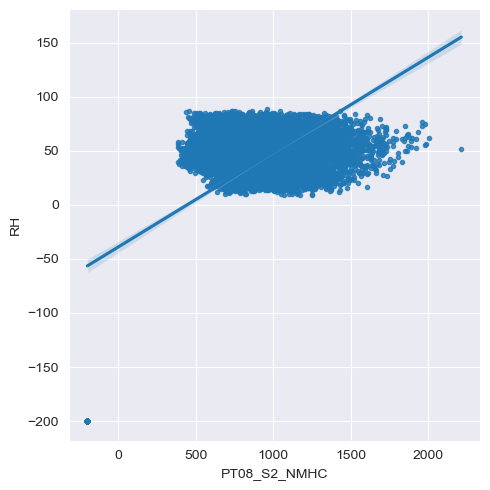

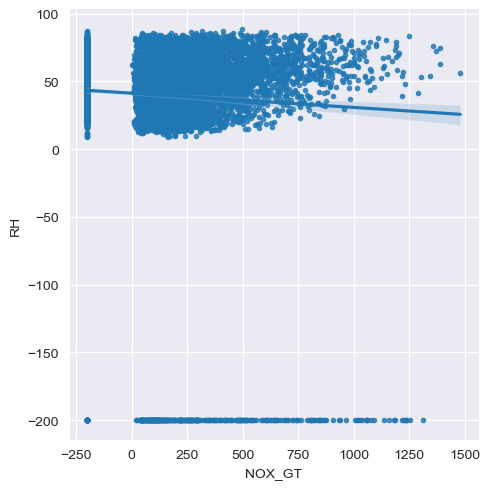

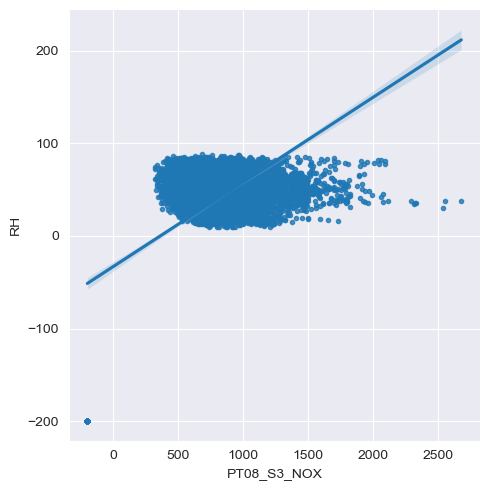

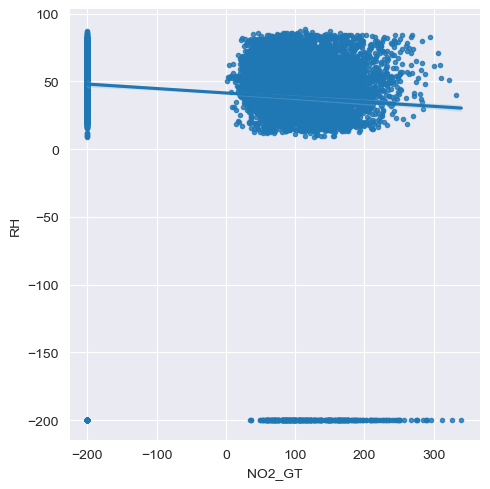

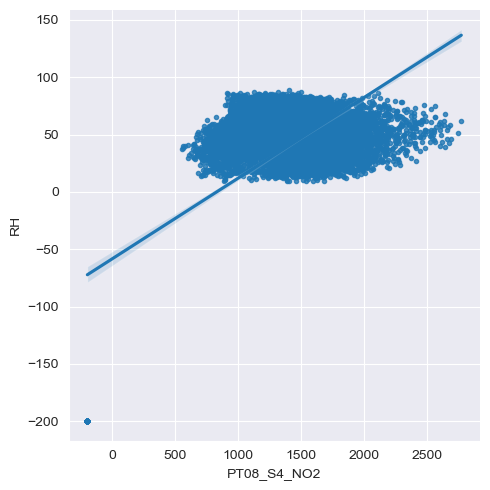

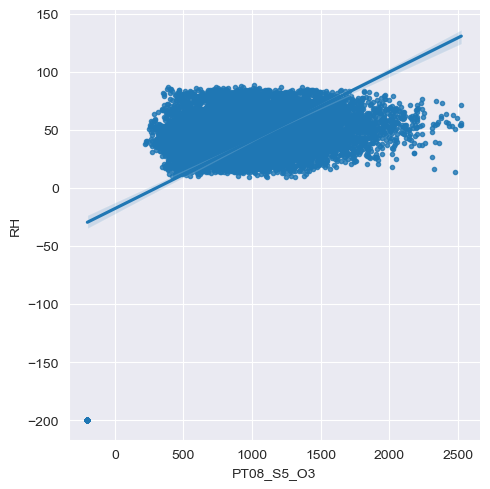

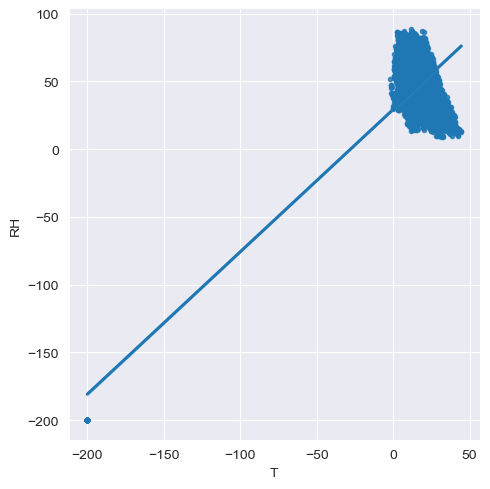

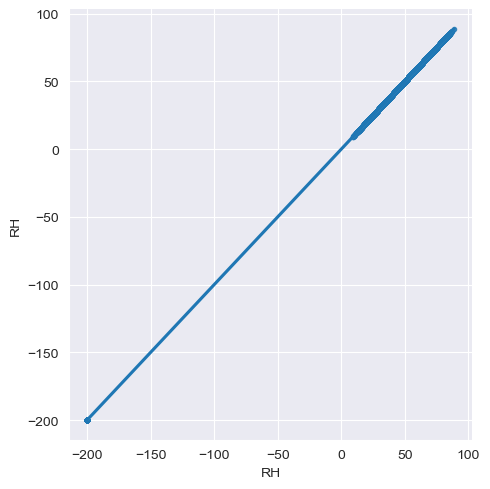

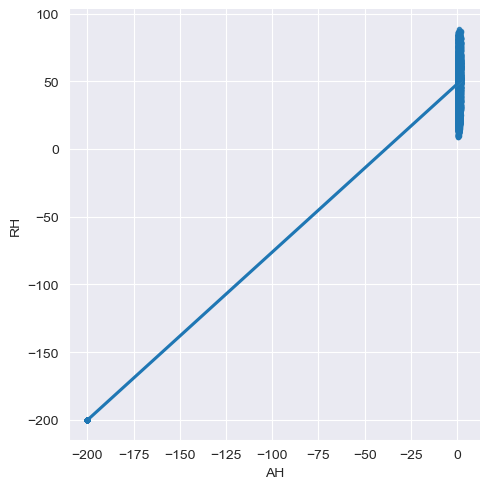

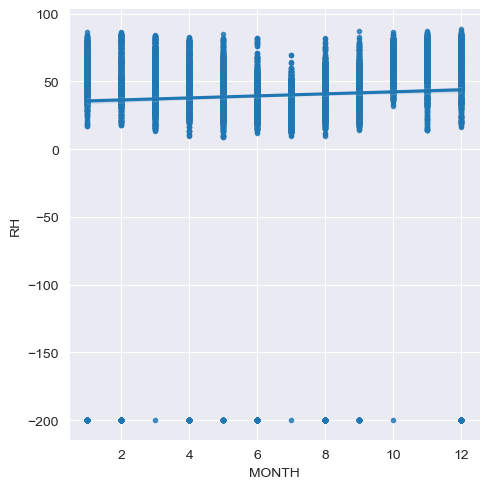

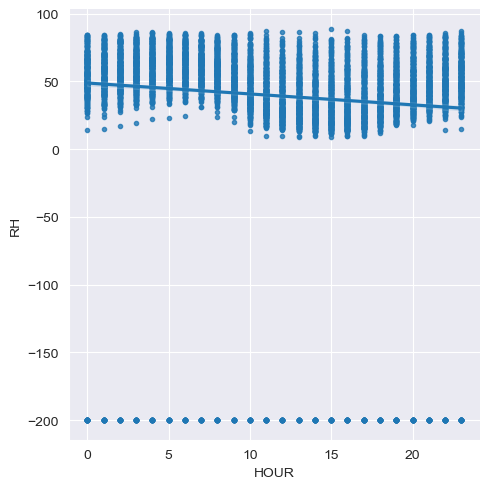

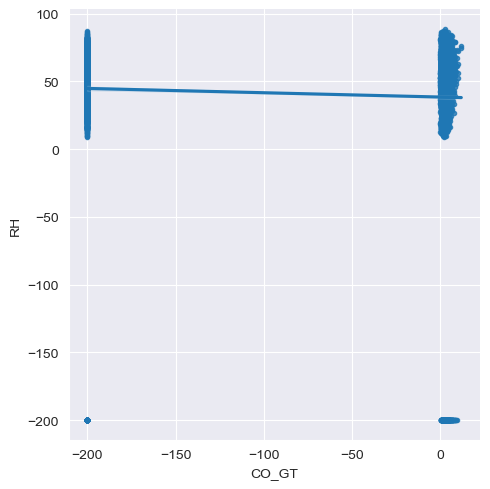

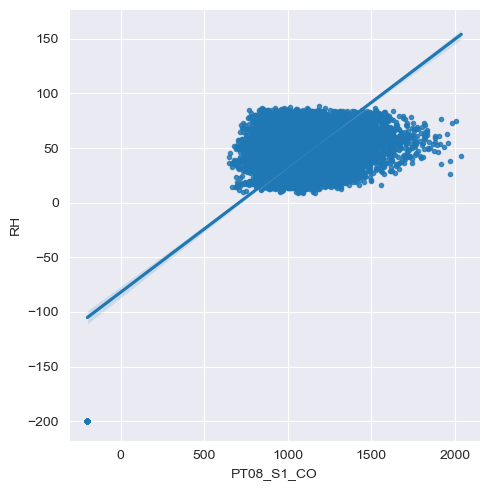

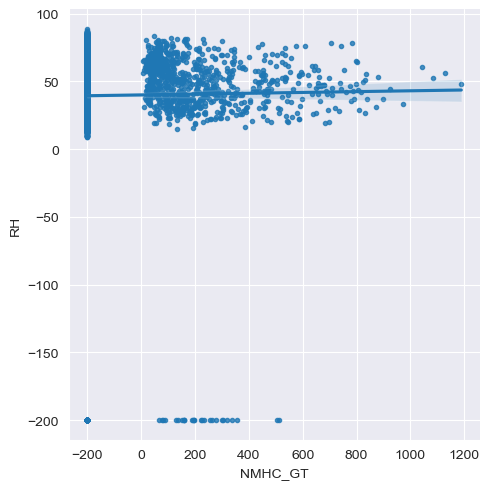

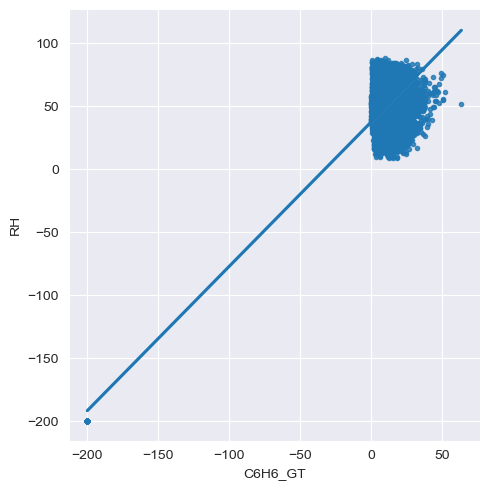

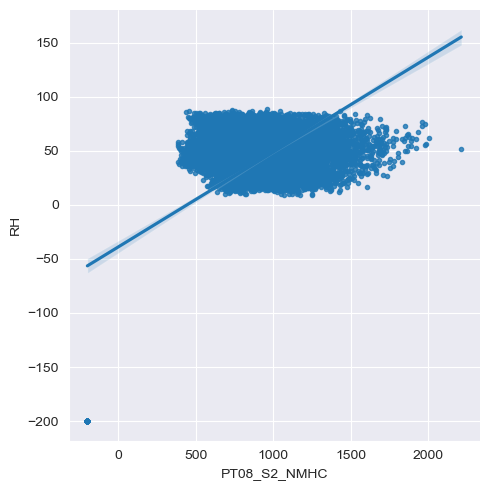

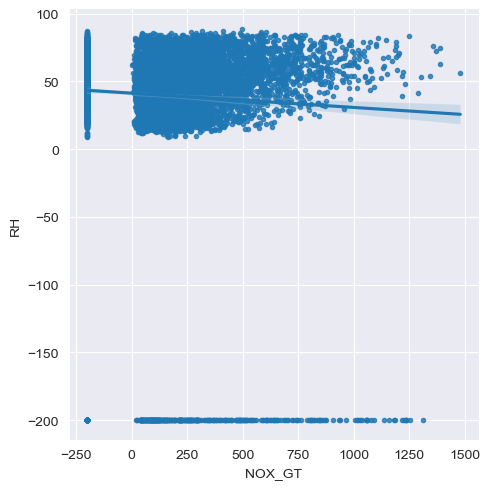

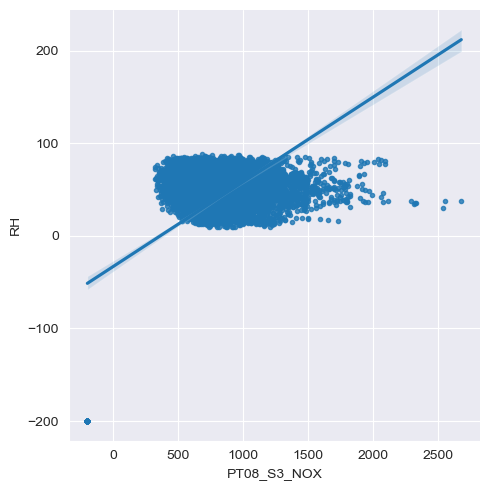

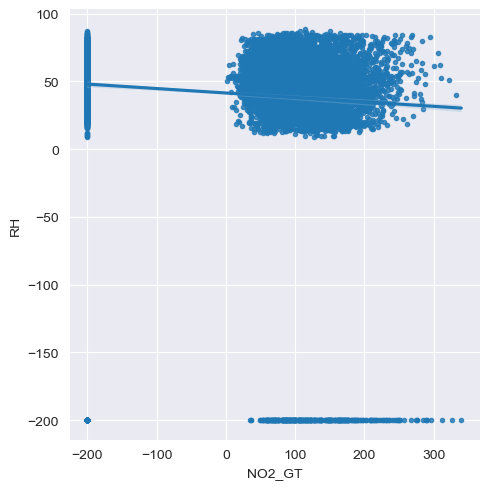

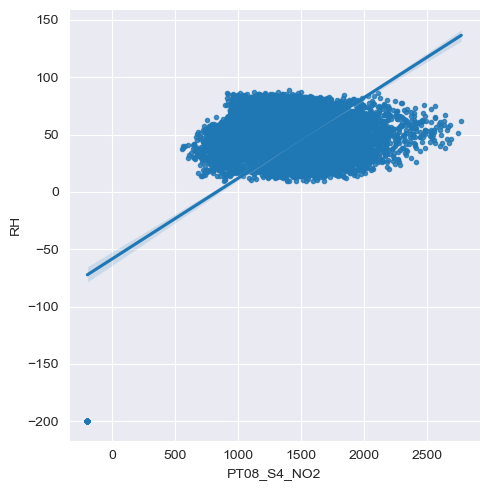

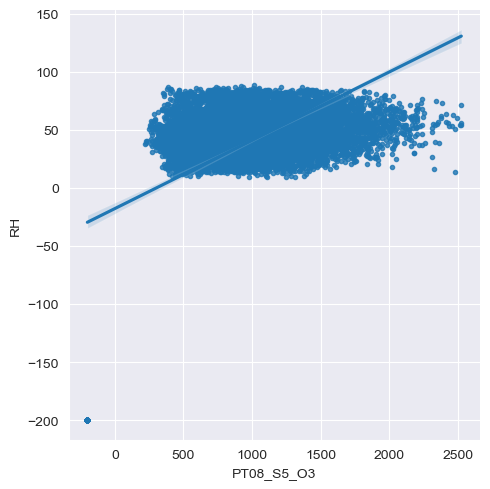

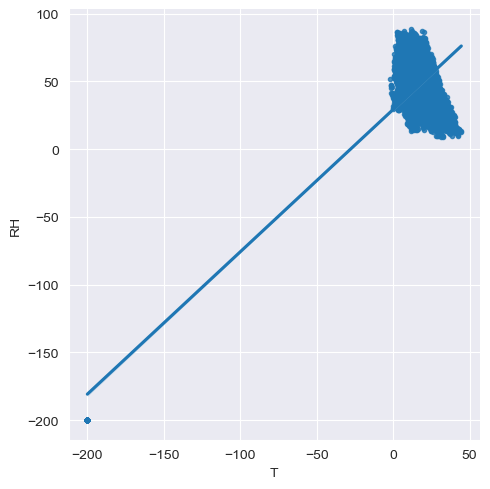

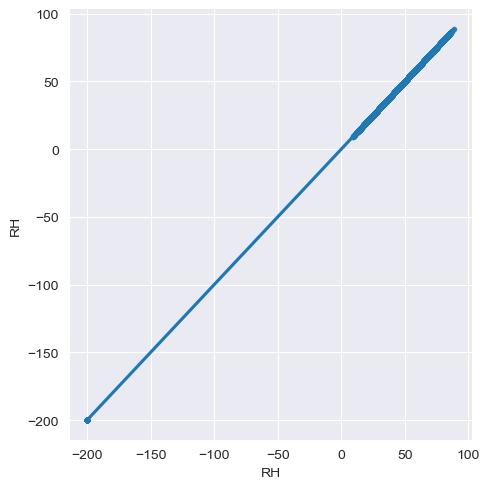

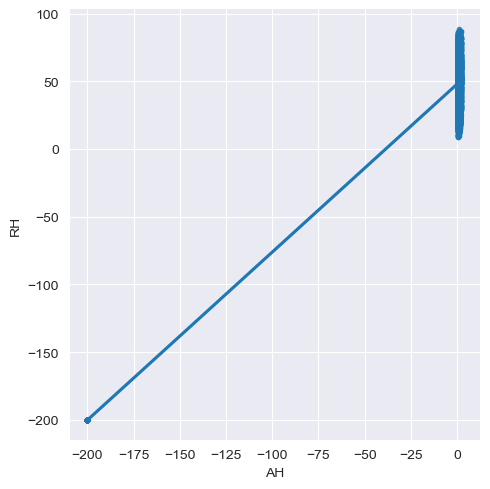

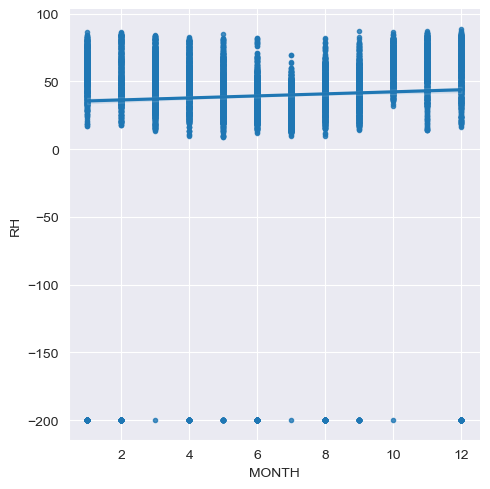

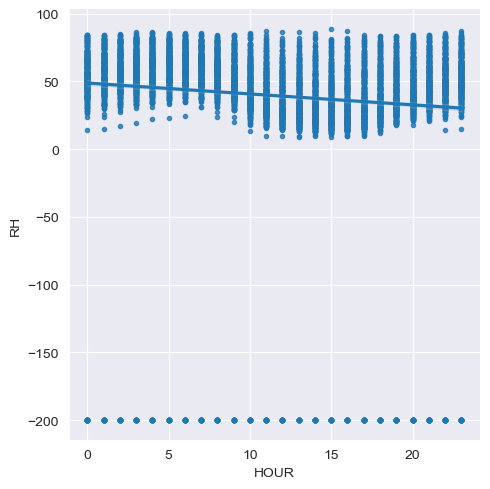

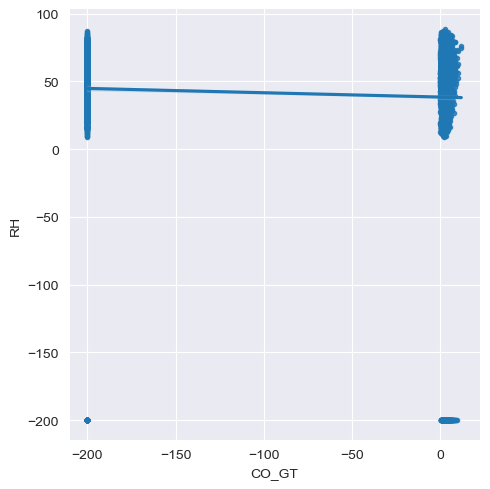

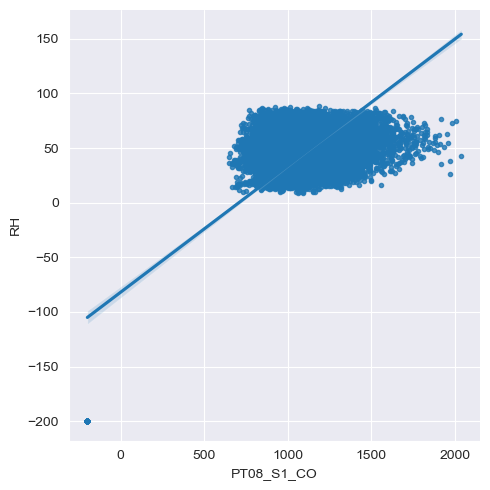

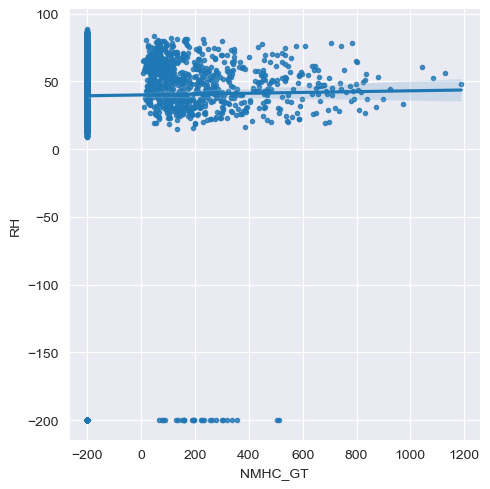

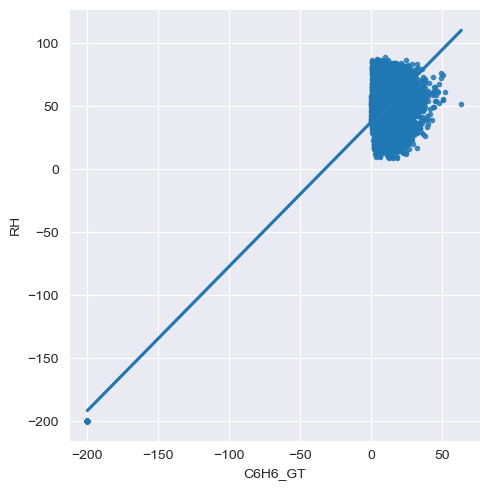

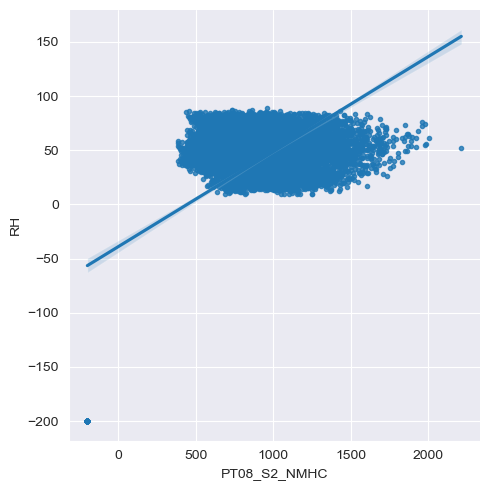

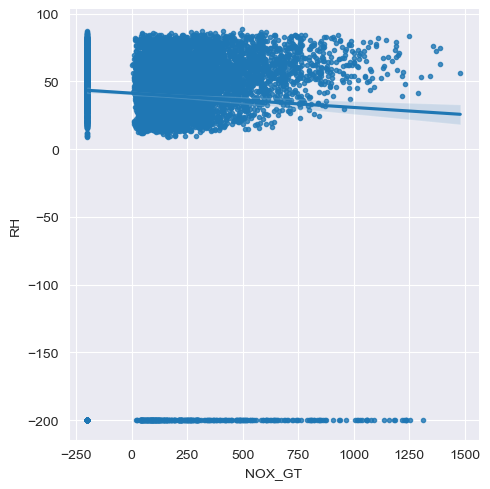

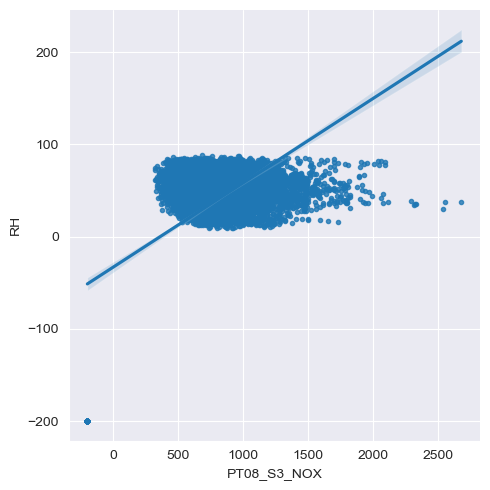

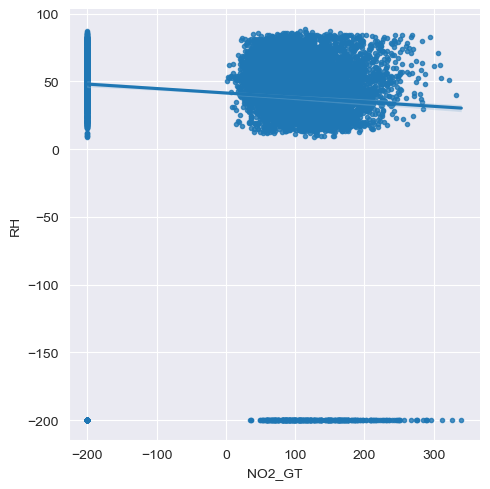

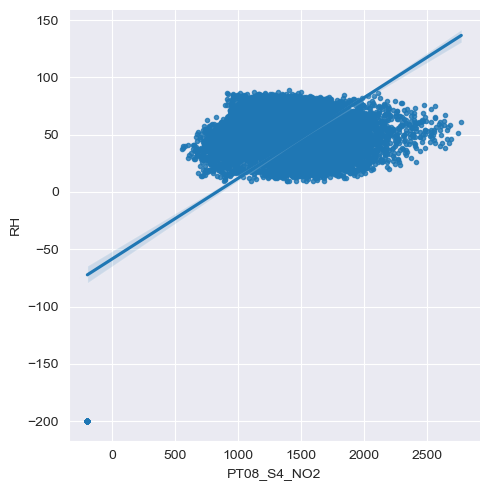

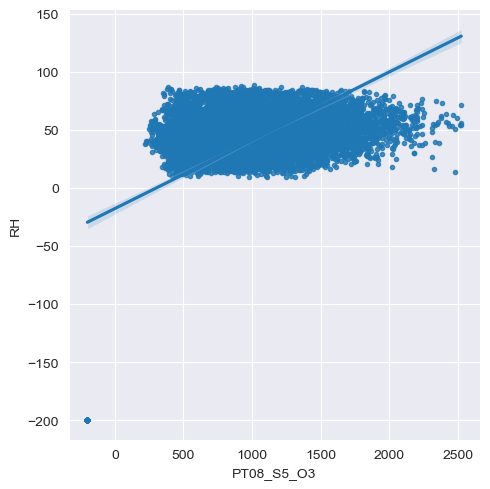

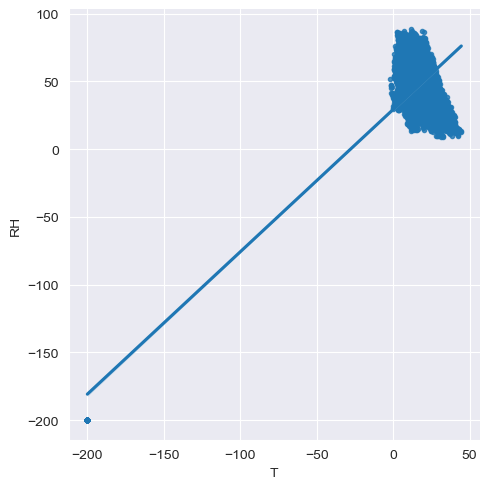

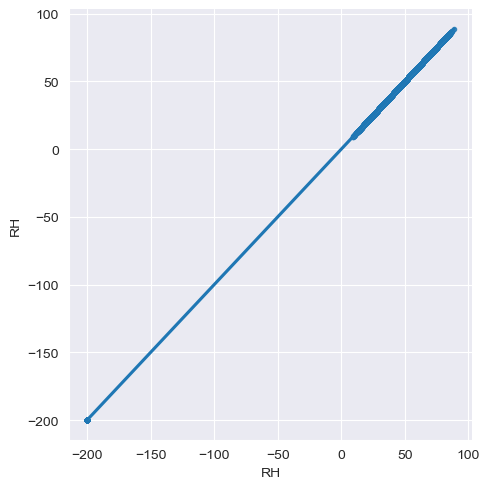

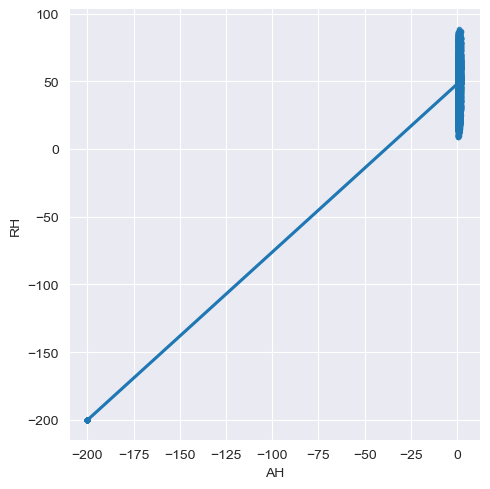

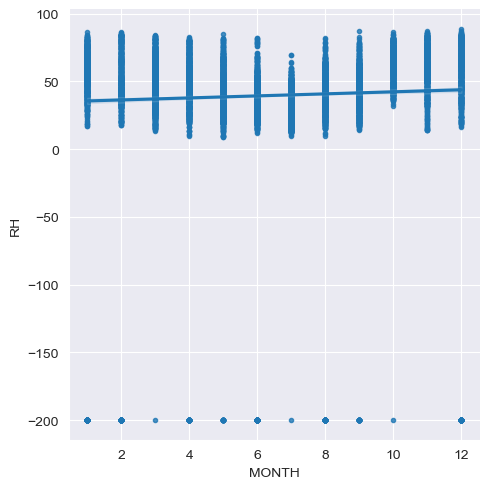

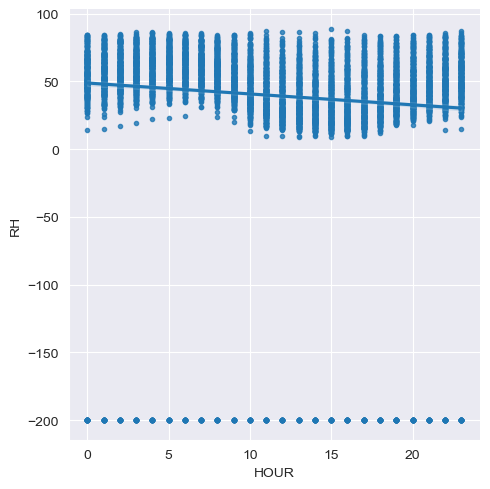

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df1.columns.tolist()[2:]:
    sns.lmplot(x=i, y='RH', data=df1, markers='.')
    plt.show()


Linear Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:

col1 = df1.columns.tolist()[2:]
X = df1[col1].drop(columns=['RH'])
Y = df1['RH']


SScaler = StandardScaler()
Xsd = SScaler.fit_transform(X)


X.head()


,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,AH,MONTH,HOUR
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578,3,18
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255,3,19
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502,3,20
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867,3,21
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888,3,22


In [38]:
Y.head()

0    48.9
1    47.7
2    54.0
3    60.0
4    59.6
Name: RH, dtype: float64

In [40]:
X_train, X_test, y_train, y_test=train_test_split(Xsd,Y,test_size=0.4, random_state=3)

In [42]:
print('Training Data Size:',X_train.shape)
print('Test Data Size:',X_test.shape)

Training Data Size: (5614, 14)
Test Data Size: (3743, 14)


In [43]:
model= LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [45]:
print('Intercept:',model.intercept_)

Intercept: 39.613609199630275


In [46]:
prediction = model.predict(X_test)
prediction

array([67.22290966, 71.82740726, 49.33816742, ..., 28.00031218,
       69.38704067, 61.75363791])

In [47]:
y_test

6432     71.7
1452     67.4
7516     55.0
4856     53.4
1075     32.1
        ...  
7204   -200.0
1759     56.2
4868     28.5
6328     68.5
4113     64.6
Name: RH, Length: 3743, dtype: float64

In [48]:
print("Co-efficient:")
list(zip(X.columns,model.coef_))

Co-efficient:


[('CO_GT', 0.1591144484891963),
 ('PT08_S1_CO', 7.618162531383183),
 ('NMHC_GT', -1.9199932762049752),
 ('C6H6_GT', -35.41618220773056),
 ('PT08_S2_NMHC', -19.15974844721366),
 ('NOX_GT', 4.2618939189210305),
 ('PT08_S3_NOX', -6.679792565838303),
 ('NO2_GT', -3.058575375790462),
 ('PT08_S4_NO2', 25.734049028041042),
 ('PT08_S5_O3', -1.3920152984890233),
 ('T', -91.46496876948292),
 ('AH', 166.6544996599882),
 ('MONTH', 4.0082340846817575),
 ('HOUR', -0.7360723849731124)]

In [49]:
from sklearn import metrics
rs=np.sqrt(metrics.mean_squared_error(y_test,prediction))
print(rs)
print("\n")
print("Therefore by applying Linear Regression we can predict RH using all the features together with RSME=",rs)

6.9716229856172935


Therefore by applying Linear Regression we can predict RH using all the features together with RSME= 6.9716229856172935


Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [51]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_y = lab_enc.fit_transform(y_train)

In [52]:
model1.fit(X_train,training_y)

LogisticRegression()

In [53]:
prediction1=model1.predict(X_test)
prediction1

array([566, 390, 312, ..., 125, 639, 541])

In [54]:
from sklearn import metrics
rs1=np.sqrt(metrics.mean_squared_error(y_test,prediction1))
print(rs1)
print("\n")
print("Therefore by applying Logistic Regression we can predict RH using all the features together with RSME=",rs1)

341.72132518319455


Therefore by applying Logistic Regression we can predict RH using all the features together with RSME= 341.72132518319455


Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()

In [57]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
prediction2=model2.predict(X_test)
prediction2

array([75.9, 67.1, 54.5, ..., 27.9, 67.6, 62.3])

In [59]:
from sklearn import metrics
rs2=np.sqrt(metrics.mean_squared_error(y_test,prediction2))
print(rs2)
print("\n")
print("Therefore by applying Decision Tree Regression we can predict RH using all the features together with RSME=",rs2)

1.4204274755150188


Therefore by applying Decision Tree Regression we can predict RH using all the features together with RSME= 1.4204274755150188


Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()

In [61]:
model3.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
prediction3=model3.predict(X_test)
prediction3

array([72.775, 67.583, 53.456, ..., 27.928, 68.128, 64.164])

In [63]:
from sklearn import metrics
rs3=np.sqrt(metrics.mean_squared_error(y_test,prediction3))
print(rs3)
print("\n")
print("Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME=",rs3)

0.6957414594994837


Therefore by applying Random Forest Regression we can predict RH using all the features together with RSME= 0.6957414594994837


Conclusion

In [64]:
print("We got following RMSE by applying different regression:\n\n")
print("Linear Regression=",rs,"\n")
print("Logistic Regression=",rs1,"\n")
print("Decision Tree Regression=",rs2,"\n")
print("Random Forest Regression=",rs3,"\n")

We got following RMSE by applying different regression:


Linear Regression= 6.9716229856172935 

Logistic Regression= 341.72132518319455 

Decision Tree Regression= 1.4204274755150188 

Random Forest Regression= 0.6957414594994837 



In [66]:
print("So we acheive best results from:")
dict={"Linear Regression": rs,"Logistic Regression": rs1,"Decision Tree Regression": rs2,"Random Forest Regression": rs3   }
res =  [key for key in dict if
        all(dict[temp] >= dict[key]
        for temp in dict)]
min_ = {k: dict[k] for k in dict.keys() & set(res)}
print(min_)

So we acheive best results from:
{'Random Forest Regression': 0.6957414594994837}
